Apresentando o shape dos dados (dimenssoes)
(4521, 17)
Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may    

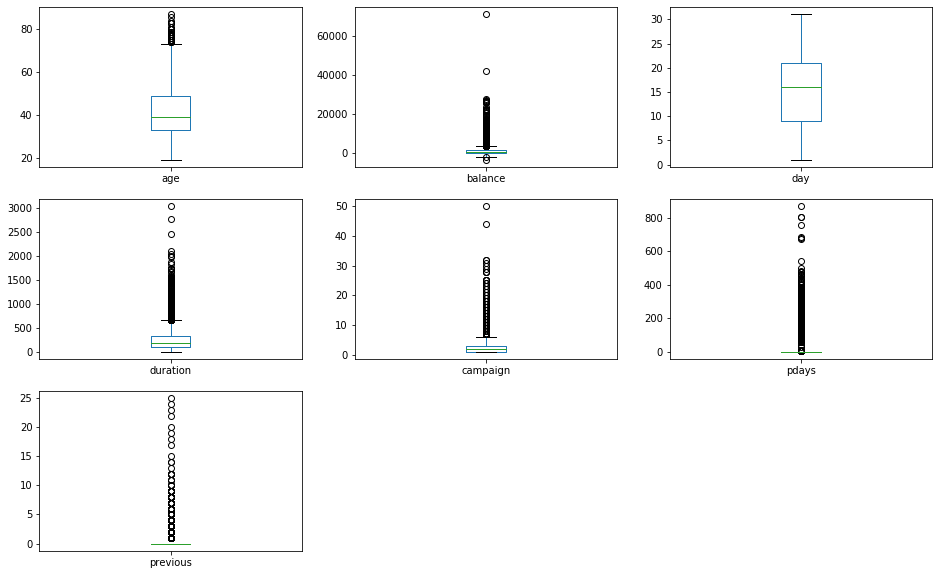

Criando histogramas dos dados por classes


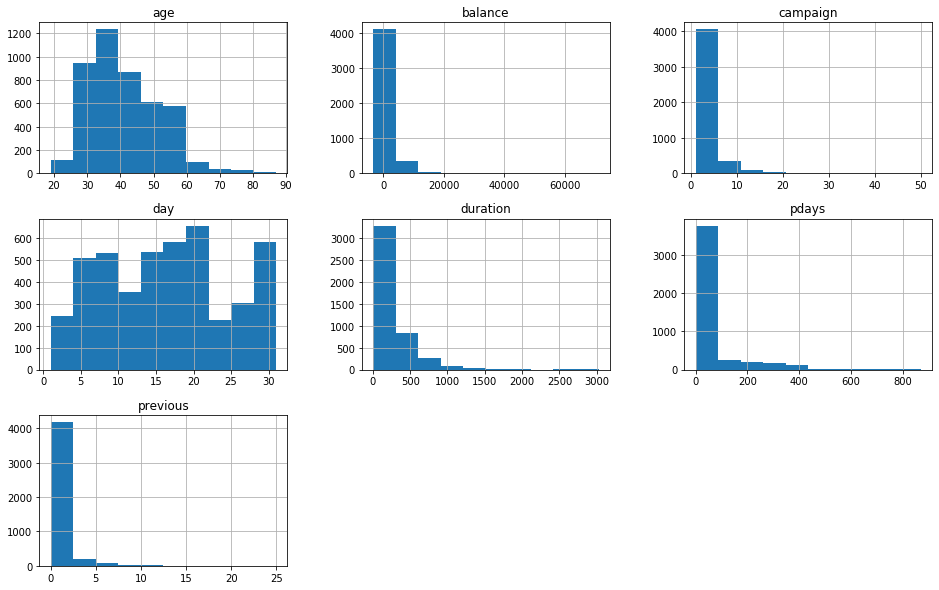

Criando graficos de dispersao dos dados com paleta de cores


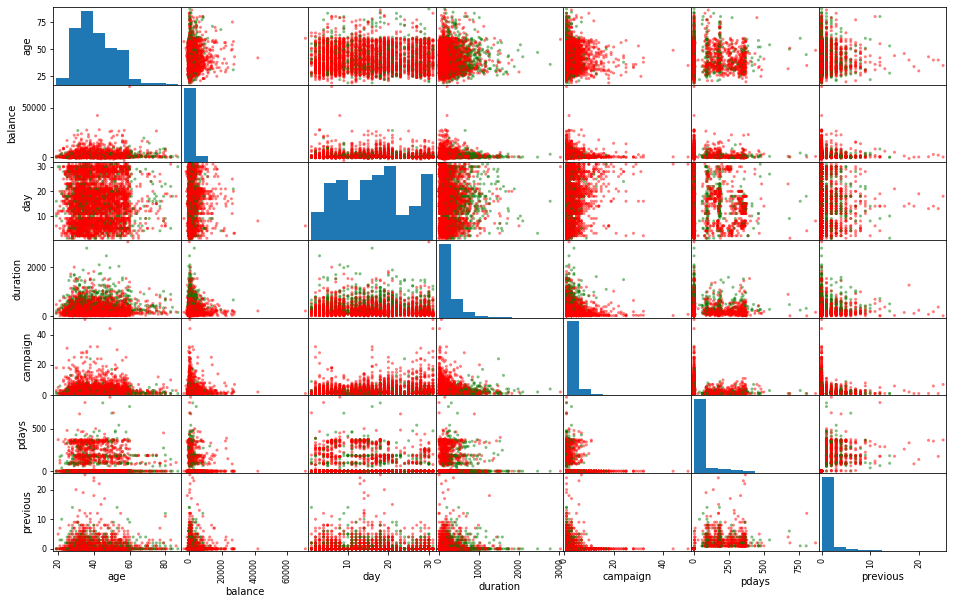

        age   balance       day  duration  campaign     pdays  previous  \
0  0.161765  0.068455  0.600000  0.024826  0.000000  0.000000      0.00   
1  0.205882  0.108750  0.333333  0.071500  0.000000  0.389908      0.16   
2  0.235294  0.062590  0.500000  0.059914  0.000000  0.379587      0.04   
3  0.161765  0.064281  0.066667  0.064548  0.061224  0.000000      0.00   
4  0.588235  0.044469  0.133333  0.073486  0.000000  0.000000      0.00   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               0   
1                0                 0              0               0   
2                0                 0              0               1   
3                0                 0              0               1   
4                1                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0         

In [2]:
#Disciplina: Solucoes de Mineracao de dados
#--------------------------------------------------------
#Script para a analise exploratoria dos dados (AED)
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import os
import zipfile
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [16, 10]
pandas.set_option('display.max_columns', None)

# Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("dados/bank.csv", delimiter=";", header='infer')

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

print("Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))")
print(dataset.head(5))

print("Conhecendo os dados estatisticos dos dados carregados (describe)")
print(dataset.describe())

print("Conhecendo a distribuicao dos dados por classes (class distribution)")
dataset = dataset.rename(columns={'y': 'class'})
print(dataset.groupby('class').size())

print("Criando grafios de caixa da distribuicao das classes")
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

print("Criando histogramas dos dados por classes")
dataset.hist()
plt.show()

print("Criando graficos de dispersao dos dados com paleta de cores")
colors_palette = {'no': 'red', 'yes': 'green'}
colors = [colors_palette[c] for c in dataset['class']]
scatter_matrix(dataset, c=colors)
#plt.savefig('tste_fig')
plt.show()

#realizando a selecão de atributos numericos para normalizacao MinMax
num_cols = dataset.columns[dataset.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
min_max_scaler = MinMaxScaler()
dataset[num_cols] = min_max_scaler.fit_transform(dataset[num_cols])

# Get dummy variables for categorical vars
data_w_dummies = pandas.get_dummies(dataset, prefix_sep='_', drop_first=True)

# X head
print(data_w_dummies.head())